In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


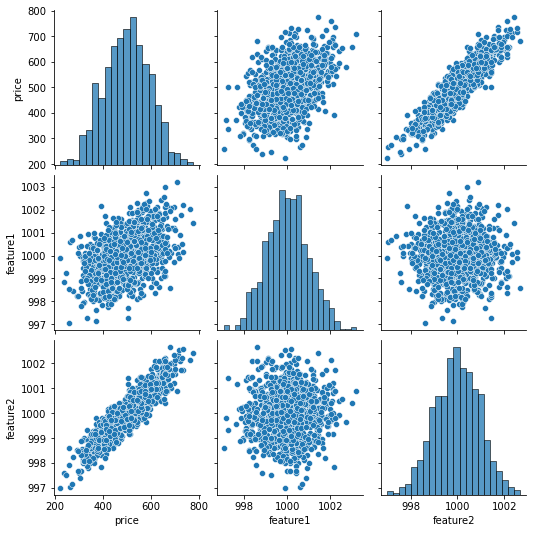

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Keras has to be worked with arrays not with dataframes
X = df[['feature1','feature2']].values #values returns numpy arrays

In [6]:
y = df['price'].values

In [7]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [16]:
#One way to avoid mistakes is normalize Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.min(),X_train.max()

(0.0, 1.0)

In [19]:
# pip install tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=8cc978cb08cdc843a75aaa10c7c4eb1f4cc3c2e7fd0910b4cb6e59dfc5cbdcee
  Stored in directory: c:\users\crq96\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [23]:
#Number is equivalent to de number of neurons you want
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [ ]:
#Lo anterior es igual a lo siguiente

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))


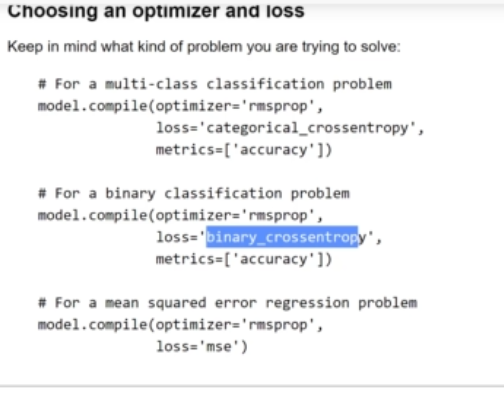

In [25]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')
#Indagar sobre los optimazer de model.compile

In [26]:
#epochs iterate num of times over data set
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256656.1562
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256581.0469
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256503.1719
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256414.5156
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256313.9375
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256199.9844
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256070.3750
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255923.3438
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255757.2344
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255570.4062
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255362.1094
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

Epoch 95/250
22/22 [==============================] - 0s 2ms/step - loss: 8502.9639
Epoch 96/250
22/22 [==============================] - 0s 1ms/step - loss: 6482.4956
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 4853.6689
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 3629.0303
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 2838.9937
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 2443.9897
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 2321.2212
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 2287.4763
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 2253.1443
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 2223.8162
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 2192.3352
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - l

22/22 [==============================] - 0s 2ms/step - loss: 233.3089
Epoch 191/250
22/22 [==============================] - 0s 2ms/step - loss: 220.6567
Epoch 192/250
22/22 [==============================] - ETA: 0s - loss: 224.113 - 0s 2ms/step - loss: 208.3764
Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 198.8847
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 188.1774
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 177.9171
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 168.1136
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 158.6766
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 150.6075
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 142.5697
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 134.4740
Epoch 201/250
22/22 [==============================] - 0s 2ms/st

In [28]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

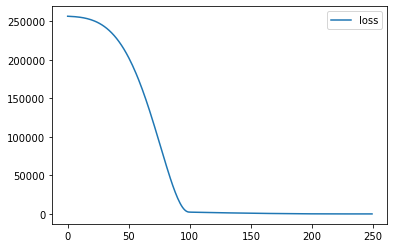

In [29]:
loss_df.plot()

In [30]:
#verbose is for show or not output
model.evaluate(X_test,y_test,verbose=0)

26.227209091186523

In [31]:
model.evaluate(X_train,y_train,verbose=0)

24.261030197143555

In [32]:
test_predictions = model.predict(X_test)

In [33]:
test_predictions

array([[406.38675],
       [624.4375 ],
       [593.00305],
       [573.2973 ],
       [367.99054],
       [580.15375],
       [516.28455],
       [460.0608 ],
       [550.3329 ],
       [448.46442],
       [612.6885 ],
       [549.67236],
       [420.20273],
       [410.02005],
       [651.86285],
       [438.2992 ],
       [509.25537],
       [661.0031 ],
       [663.5346 ],
       [566.39233],
       [335.51373],
       [445.9099 ],
       [383.7359 ],
       [379.8656 ],
       [567.56226],
       [611.6288 ],
       [533.408  ],
       [428.91412],
       [656.45636],
       [415.07605],
       [443.60635],
       [486.15143],
       [439.46335],
       [682.80304],
       [425.67966],
       [418.87433],
       [502.67844],
       [551.4204 ],
       [510.92178],
       [396.69302],
       [619.4409 ],
       [417.64484],
       [605.3209 ],
       [446.84918],
       [503.00278],
       [582.38947],
       [669.6639 ],
       [491.3285 ],
       [319.6458 ],
       [486.47464],


In [38]:
test_predicts = pd.Series(test_predictions.reshape(300,))

In [36]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [40]:
pred_df = pd.concat([pred_df,test_predicts],axis=1)
pred_df

,Test True Y,0
0,402.296319,406.386749
1,624.156198,624.437500
2,582.455066,593.003052
3,578.588606,573.297302
4,371.224104,367.990540
...,...,...
295,525.704657,530.136963
296,502.909473,516.722656
297,612.727910,610.534790
298,417.569725,417.927765


In [41]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [42]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.386749
1,624.156198,624.437500
2,582.455066,593.003052
3,578.588606,573.297302
4,371.224104,367.990540
...,...,...
295,525.704657,530.136963
296,502.909473,516.722656
297,612.727910,610.534790
298,417.569725,417.927765


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

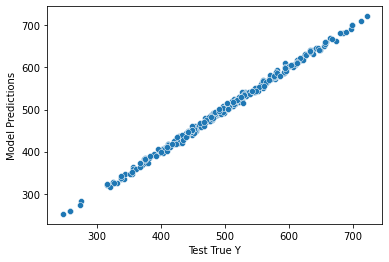

In [43]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.153923178382991

In [46]:
df.describe()
#mae is less than the min price and the mean price. Its a good indicator

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [47]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

26.227211102734316

In [48]:
#Root Mean Squared Error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.1212509314360215

In [49]:
new_gem = [[998,1000]]

In [52]:
new_gem = scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [53]:
model.predict(new_gem)

array([[420.99515]], dtype=float32)

For saving and load a model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('mygem_model.h5')

In [58]:
later_model = load_model('mygem_model.h5')

In [59]:
later_model.predict(new_gem)

array([[420.99515]], dtype=float32)